## Azure Python SDK

https://github.com/Azure/azure-sdk-for-python/tree/main/sdk/formrecognizer/azure-ai-formrecognizer

In [1]:
!pip install azure-ai-formrecognizer --pre

In [2]:
import os
from azure.core.exceptions import ResourceNotFoundError
from azure.ai.formrecognizer import FormRecognizerClient
from azure.ai.formrecognizer import FormTrainingClient
from azure.core.credentials import AzureKeyCredential

In [3]:
from PIL import Image
import requests
import io

from matplotlib.pyplot import imshow
%matplotlib inline

In [4]:
endpoint = "https://avkash-form-rec.cognitiveservices.azure.com/"
key = "5ec7d09277104720be739d80bb4bc384"

In [5]:
form_recognizer_client = FormRecognizerClient(endpoint, AzureKeyCredential(key))

In [6]:
idURL = "https://venngage-wordpress.s3.amazonaws.com/uploads/2019/12/Blue-Triangle-Personal-Business-Card-Template.png"

In [9]:
response = requests.get(idURL)
image_bytes = io.BytesIO(response.content)

img = Image.open(image_bytes)

# Dont use, it open image in a window
#img.show()

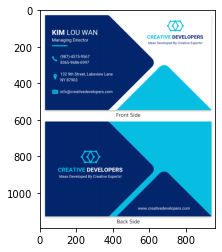

In [10]:
imshow(img)

### begin_recognize_business_cards_from_url
### begin_recognize_business_cards

https://github.com/Azure/azure-sdk-for-python/blob/main/sdk/formrecognizer/azure-ai-formrecognizer/samples/sample_recognize_business_cards.py

In [12]:
#idURL = "https://raw.githubusercontent.com/Azure-Samples/cognitive-services-REST-api-samples/master/curl/form-recognizer/id-license.jpg"
# idURL = "https://dps.mn.gov/divisions/dvs/PublishingImages/new-cards/mn-adult-dl.jpg"


#poller = form_recognizer_client.begin_recognize_id_documents(idURL)
poller = form_recognizer_client.begin_recognize_business_cards_from_url(idURL)
business_cards = poller.result()

for idx, business_card in enumerate(business_cards):
            print("--------Recognizing business card #{}--------".format(idx+1))
            contact_names = business_card.fields.get("ContactNames")
            if contact_names:
                for contact_name in contact_names.value:
                    print("Contact First Name: {} has confidence: {}".format(
                        contact_name.value["FirstName"].value, contact_name.value["FirstName"].confidence
                    ))
                    print("Contact Last Name: {} has confidence: {}".format(
                        contact_name.value["LastName"].value, contact_name.value["LastName"].confidence
                    ))
            company_names = business_card.fields.get("CompanyNames")
            if company_names:
                for company_name in company_names.value:
                    print("Company Name: {} has confidence: {}".format(company_name.value, company_name.confidence))
            departments = business_card.fields.get("Departments")
            if departments:
                for department in departments.value:
                    print("Department: {} has confidence: {}".format(department.value, department.confidence))
            job_titles = business_card.fields.get("JobTitles")
            if job_titles:
                for job_title in job_titles.value:
                    print("Job Title: {} has confidence: {}".format(job_title.value, job_title.confidence))
            emails = business_card.fields.get("Emails")
            if emails:
                for email in emails.value:
                    print("Email: {} has confidence: {}".format(email.value, email.confidence))
            websites = business_card.fields.get("Websites")
            if websites:
                for website in websites.value:
                    print("Website: {} has confidence: {}".format(website.value, website.confidence))
            addresses = business_card.fields.get("Addresses")
            if addresses:
                for address in addresses.value:
                    print("Address: {} has confidence: {}".format(address.value, address.confidence))
            mobile_phones = business_card.fields.get("MobilePhones")
            if mobile_phones:
                for phone in mobile_phones.value:
                    print("Mobile phone number: {} has confidence: {}".format(phone.value, phone.confidence))
            faxes = business_card.fields.get("Faxes")
            if faxes:
                for fax in faxes.value:
                    print("Fax number: {} has confidence: {}".format(fax.value, fax.confidence))
            work_phones = business_card.fields.get("WorkPhones")
            if work_phones:
                for work_phone in work_phones.value:
                    print("Work phone number: {} has confidence: {}".format(work_phone.value, work_phone.confidence))
            other_phones = business_card.fields.get("OtherPhones")
            if other_phones:
                for other_phone in other_phones.value:
                    print("Other phone number: {} has confidence: {}".format(other_phone.value, other_phone.confidence))

--------Recognizing business card #1--------
Contact First Name: KIM LOU has confidence: 1.0
Contact Last Name: WAN has confidence: 1.0
Job Title: Managing Director has confidence: 0.99
Email: info@creativedevelopers.com has confidence: 0.99
Website: www.creativedevelopers.com has confidence: 0.99
Address: 132 9th Street, Lakeview Lane NY 87903 has confidence: 0.987
Other phone number: None has confidence: 0.989
Other phone number: None has confidence: 0.987
